# Homework 2: Simple linear regression using TensorFlow in Python

*   Universidad de Monterrey
*   Cristopher Hildebrand Sánchez
*   Inteligencia Artificial 2
*   Dr Andrés Hernández Gutiérrez
*   28/08/2024


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##Librerias utilizadas en el código.

1. import numpy as np: Importa NumPy, una biblioteca para operaciones matemáticas

2. import pandas as pd: Importa pandas, utilizada para la manipulación y análisis de datos.

3. import tensorflow as tf: Importa TensorFlow, una biblioteca para construir y entrenar modelos de aprendizaje.

4. import matplotlib.pyplot as plt: Importa pyplot de Matplotlib, usado para crear gráficos.

5. from sklearn.model_selection import train_test_split: Importa la función train_test_split de Scikit-learn, que divide datos en conjuntos de entrenamiento y prueba.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

##Función para generación de datos.

def generate_data(true_coeffs = np.array([10,1]), noise_std = 2, num_samples = 100):

1.Acepta tres argumentos:
* true_coeffs: coeficientes de la relación lineal entre [10, 1].
* noise_std: desviación estándar del ruido en 2.
* num_samples: número de muestras a generar en este caso 100.

2.Semilla para reproducibilidad: np.random.seed(4500)
* Establece la semilla del generador de números aleatorios para asegurar que los resultados sean reproducibles.

3.Generación de datos:
* x = np.arange(0,100,1): Crea un arreglo x con valores desde 0 hasta 99.
* y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc = 0.0, scale = noise_std, size = num_samples): Calcula "y" con una relación lineal y añade ruido normal random.

4.Respuesta: return (x,y)
* Devuelve una tupla que contiene los valores de "x" y "y".

In [ ]:
def generate_data(true_coeffs = np.array([10,1]), noise_std = 2, num_samples = 100):

    #Seed for reproducibility
    np.random.seed(4500)

    #Generate synthetic data
    x = np.arange(0,100,1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc = 0.0, scale = noise_std, size = num_samples)

    #Return features and response
    return (x,y)

##Generación de datos

1.Generación de coeficientes: true_coeffs = np.array([10,1])
* Crea un arreglo true_coeffs que contiene los coeficientes para la relación lineal.

2.Definición del ruido: noise_std = 5
* Establece el ruido que se añadirá a los datos en 5.

3.Generación del conjunto de datos: x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)
* Llama a la función generate_data con los parámetros definidos (true_coeffs, noise_std y num_samples=100) para generar un conjunto de datos.
* Asigna los valores generados a "x" y "y".

In [ ]:
#Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10,1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

##Visualización de datos generados

1.Visualización de datos: plt.figure(figsize=(10,7))
* Crea una nueva figura para la visualización con un tamaño de 10x7.

2.Gráfico de dispersión: plt.scatter(x, y, label='Synthetic dataset')
* Crea un gráfico de dispersión de los puntos (x, y) y les asigna la etiqueta 'Synthetic dataset'.

3.Etiqueta en el eje x: plt.xlabel(r"x", fontsize = 20)
* Asigna una etiqueta al eje x con el texto "x".

4.Etiqueta en el eje y: plt.ylabel(f_{\mathbf{w}}(x)", fontsize = 20)
* Asigna una etiqueta al eje y con el texto "fw(x)".

5.Título del gráfico: plt.title(f_{{'\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon, where \epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})", fontsize = 20)
* Asigna un título al gráfico que describe la relación lineal utilizada, incluyendo los coeficientes y el ruido.

6.Leyenda del gráfico: plt.legend()
* Muestra la leyenda en el gráfico.

7.Mostrar el gráfico: plt.show()
* Muestra el gráfico en pantalla.

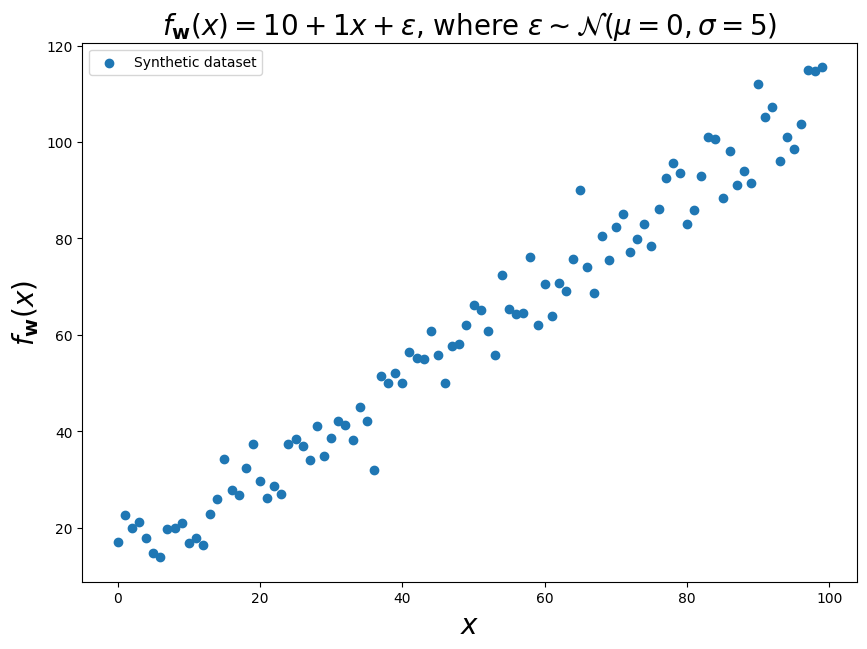

In [ ]:
#Visualise the generated synthetica dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize = 20)
plt.legend()
plt.show()

##División de datos en Train y Test - Visualización de datos.

1.División de los datos en conjuntos de entrenamiento y prueba: x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)
* Utiliza la función train_test_split para dividir los datos x y y en conjuntos de entrenamiento y prueba.
* test_size = 0.2 indica que el 20% de los datos se utilizarán para pruebas.
*   random_state = 42 establece una semilla para asegurar la reproducibilidad de la división.
* shuffle = True asegura que los datos se mezclen antes de ser divididos.

2.Visualización del conjunto de datos dividido: plt.figure(figsize = (10,7))
* Crea una nueva figura para la visualización con un tamaño de 10x7.

3.Gráfico de dispersión del conjunto de prueba: plt.scatter(x, y, label='Testing dataset')
* Crea un gráfico de dispersión de todos los puntos (x, y) y los etiqueta como 'Testing dataset'.

4.Gráfico de dispersión del conjunto de entrenamiento: plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
* Crea un gráfico de dispersión de los puntos de entrenamiento (x_train, y_train) y los etiqueta como 'Training dataset', asignándoles un color rojo.

5.Etiqueta en el eje x: plt.xlabel(r"x", fontsize = 20)
* Asigna una etiqueta al eje x con el texto "x".

6.Etiqueta en el eje y: plt.ylabel("f_{\mathbf{w}}(x)", fontsize = 20)
* Asigna una etiqueta al eje y con el texto "f_w(x)".

7.Título del gráfico: plt.title(rf"f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon, where \epsilon\sim \mathcal{{N}}(\mu=0, \sigma={noise_std})", fontsize = 20)
* Asigna un título al gráfico que describe la relación lineal y el ruido, incluyendo los coeficientes y el ruido.

8.Leyenda del gráfico: plt.legend()
* Muestra la leyenda en el gráfico.

9.Mostrar el gráfico: plt.show()
* Muestra el gráfico en pantalla.

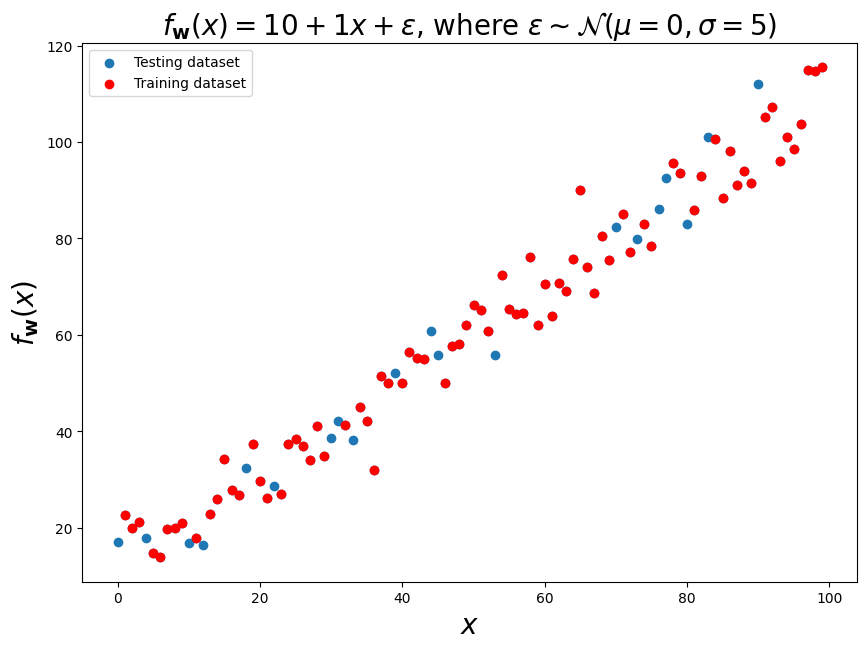

In [ ]:
#Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

#Visualise the generated synthetica dataset
plt.figure(figsize = (10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize = 20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize = 20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon\sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize = 20)
plt.legend()
plt.show()

##Construcción del modelo de regresión lineal

1.Construcción del modelo de regresión lineal: model = tf.keras.Sequential([
* Crea un modelo secuencial de Keras, que permite construir modelos de manera lineal agregando capas.

2.Capa de entrada: tf.keras.layers.Input(shape=(1,)),
* Define la capa de entrada del modelo, especificando que el modelo aceptará entradas con una forma de 1 (una sola característica).

3.Capa densa: tf.keras.layers.Dense(1)
* Agrega una capa densa (totalmente conectada) al modelo que tiene una sola neurona, para una regresión lineal simple.

In [ ]:
#Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

##Compliación y resumen del modelo

1.Compilación deel.l modelo: modcompile(optimizer='adam', loss='mse')
* Compila el modelo configurando el optimizador y la función de pérdida.
* optimizer='adam' utiliza el optimizador Adam, que es un método para el ajuste de parámetros en redes neuronales.
* loss='mse' establece la función de pérdida como el error cuadrático medio (Mean Squared Error), que es utilizada en problemas de regresión.

2.Resumen del modelo: model.summary()
* Muestra un resumen del modelo, que incluye la arquitectura del modelo, las capas, la forma de las salidas, el número de parámetros entrenables y no entrenables.

In [ ]:
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

##Entrenamiento del modelo

1.Entrenamiento del modelo: model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)
* Entrena el modelo utilizando los datos de entrenamiento x_train y y_train.
* epochs=500 indica que el modelo se entrenará durante 500 épocas.
* batch_size=10 establece que el modelo actualizará sus pesos después de procesar 10 muestras.
* validation_split=0.10 utiliza el 10% de los datos de entrenamiento para la validación durante el entrenamiento.
* verbose=1 proporciona información detallada sobre el progreso del entrenamiento.

2.Evaluación del modelo: loss = model.evaluate(x_test, y_test)
* Evalúa el rendimiento del modelo utilizando los datos de prueba x_test y y_test.
* Almacena la pérdida (loss) calculada en la variable loss.

3.Impresión de la pérdida de prueba: print(f'\nTest Loss: {loss}')
* Imprime la pérdida del modelo en el conjunto de datos de prueba.

4.Obtención de los pesos del modelo: weights = model.layers[0].get_weights()
* Obtiene los pesos y sesgos de la primera capa del modelo y los almacena en la variable weights.

5.Impresión de los pesos y sesgos: print(f"Weights [w1]: {weights[0]}") print(f"Biases [w0]: {weights[1]}")
* Imprime los pesos (w1) y sesgos (w0) del modelo entrenado.

In [ ]:
#Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

#Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

#Print the widgets of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 13374.7178 - val_loss: 17159.3594
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13219.5566 - val_loss: 17022.1328
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13092.8271 - val_loss: 16886.5762
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12243.2725 - val_loss: 16750.9453
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11850.7334 - val_loss: 16616.1523
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11115.9082 - val_loss: 16485.9297
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11328.7920 - val_loss: 16356.6143
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11577.4199 - val_loss: 16225.6738
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10998.6992 - val_loss: 16097.0010
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12528.8281 - val_loss: 15970.2070
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11356.8721 - val_loss: 15848.1

##Creación de predicciones

1.Realización de predicciones en el conjunto de prueba: y_pred = model.predict(x_test)
* Utiliza el modelo entrenado para hacer predicciones sobre los datos de prueba x_test.
* Almacena las predicciones en la variable y_pred.

2.Realización de predicciones en el conjunto de entrenamiento: y_pred_train = model.predict(x_train)
* Utiliza el modelo entrenado para hacer predicciones sobre los datos de entrenamiento x_train.
* Almacena las predicciones en la variable y_pred_train.

In [ ]:
#Make predictions
y_pred = model.predict(x_test)

#Make predictions
y_pred_train = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


##Gráfica de las predicciones

1.Creación de la figura para la visualización: plt.figure(figsize=(12,6))
* Crea una nueva figura para la visualización con un tamaño de 12x6.

2.Gráfico de dispersión de los datos de entrenamiento: plt.scatter(x_train, y_train, label='Training data')
* Crea un gráfico de dispersión de los puntos de entrenamiento (x_train, y_train) y los etiqueta como 'Training data'.

3.Trazado de la línea del modelo: plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
* Traza una línea que representa las predicciones del modelo en el conjunto de entrenamiento, utilizando los valores x_train y y_pred_train.
* La línea tiene un ancho de 3 y se pinta de color rojo.

4.Etiqueta en el eje x: plt.xlabel(r'x', fontsize = 20)
* Asigna una etiqueta al eje x con el texto "x"¿.

5.Etiqueta en el eje y: plt.ylabel("\hat{f}_{\mathbf{w}}(x)", fontsize = 20)
* Asigna una etiqueta al eje y con el texto "fw(x)".

6.Leyenda del gráfico: plt.legend()
* Muestra la leyenda en el gráfico.

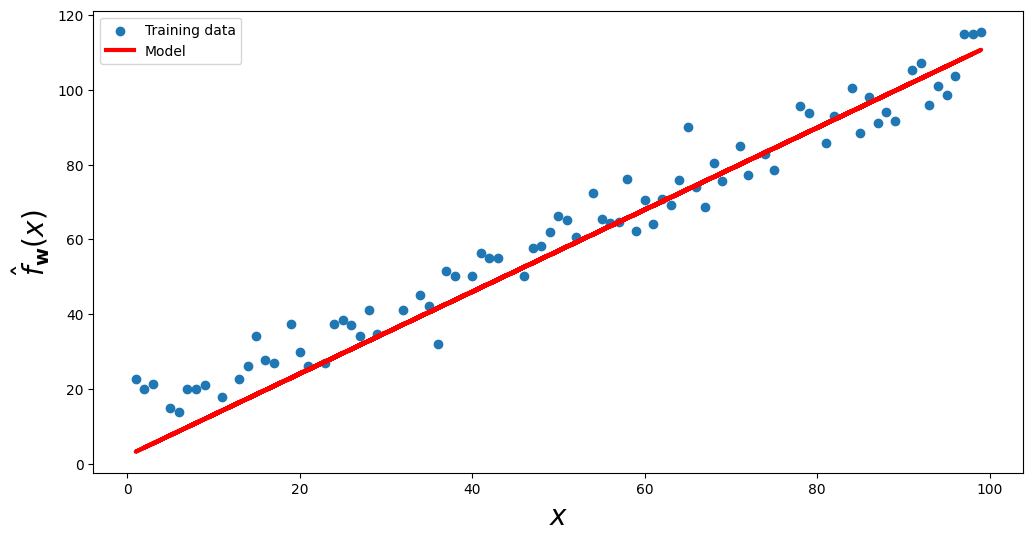

In [ ]:
#Plot the results
plt.figure(figsize=(12,6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize = 20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize = 20)
plt.legend();

##Conclusión personal

En lo personal, este es un tema que ya conocía gracias al curso de inteligencia artificial 1. Aunque se utiliza una sintaxis diferente y algunas funciones de manera diferente, sigue siendo algo muy similar.

Lo que me pareció muy bueno de esta tarea fue la parte de GitHub. Aunque estoy consciente de que es algo que se utiliza de manera diaria en la programación, nunca había tenido la oportunidad ni el tiempo de poder aprender de ello, por lo que el uso de GitHub lo tomo como algo de mucho valor.